## Predicción de Ventas en el Viernes Negro

Este conjunto de datos comprende transacciones de ventas registradas en una tienda minorista. Es un conjunto de datos clásico para explorar y ampliar tus habilidades de ingeniería de características y tu comprensión cotidiana de múltiples experiencias de compra. Este es un problema de regresión. El conjunto de datos tiene 550,069 filas y 12 columnas.

Problema: Predecir el monto de compra.

### Descripción General de los Datos
El conjunto de datos tiene 550,068 filas (transacciones) y 12 columnas (características) como se describen a continuación:

* User_ID: Identificación única del usuario. Hay un total de 5891 usuarios en el conjunto de datos.
* Product_ID: Identificación única del producto. Hay un total de 3623 productos en el conjunto de datos.
* Gender: indica el género de la persona que realiza la transacción.
* Age: indica el grupo de edad de la persona que realiza la transacción.
* Occupation: muestra la ocupación del usuario, ya etiquetada con números del 0 al 20.
* City_Category: Categoría de la ciudad de residencia del usuario. Las ciudades se categorizan en 3 categorías diferentes: 'A', 'B' y 'C'.
* Stay_In_Current_City_Years: Indica cuánto tiempo ha vivido el usuario en esta ciudad.
* Marital_Status: es 0 si el usuario no está casado y 1 en caso contrario.
* Product_Category_1 a _3: Categoría del producto. Las tres ya están etiquetadas con números.
* Purchase: Monto de la compra.

 Importar bibliotecas y cargar los datos

In [2]:
# Para manipulación de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

# Cargar los datos de entrenamiento y prueba
train_data = pd.read_csv('blackFriday_train.csv')
test_data = pd.read_csv('blackFriday_test.csv')


Comprender la estructura de los datos

In [3]:
# Ver las primeras filas de los datos de entrenamiento
print(train_data.head())

# Comprobar información sobre el conjunto de entrenamiento
print(train_data.info())

# Resumen estadístico de las variables numéricas
print(train_data.describe())


   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN   

Explorar las variables categóricas

In [4]:
# Conteo de valores únicos en variables categóricas
print(train_data['Gender'].value_counts())
print(train_data['Age'].value_counts())
print(train_data['City_Category'].value_counts())
print(train_data['Stay_In_Current_City_Years'].value_counts())


Gender
M    414259
F    135809
Name: count, dtype: int64
Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64
City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64
Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64


Text(0.5, 1.0, 'Tipos de datos')

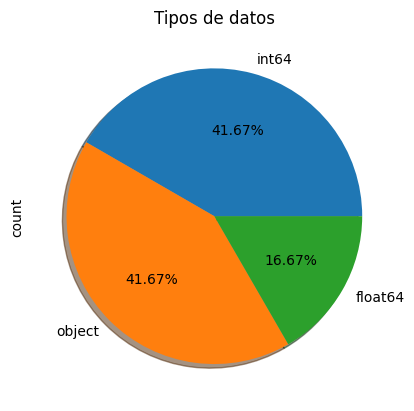

In [5]:
train_data.dtypes.value_counts().plot.pie(autopct='%1.2f%%', shadow=True)
plt.title('Tipos de datos')

In [6]:
train_data.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


De acuerdo con nuestros datos, el producto P00265242 fue el más popular, la mayor cantidad de compradores son hombres, el grupo de edad de 26 a 35 años y la ciudad con más transacciones es la B.

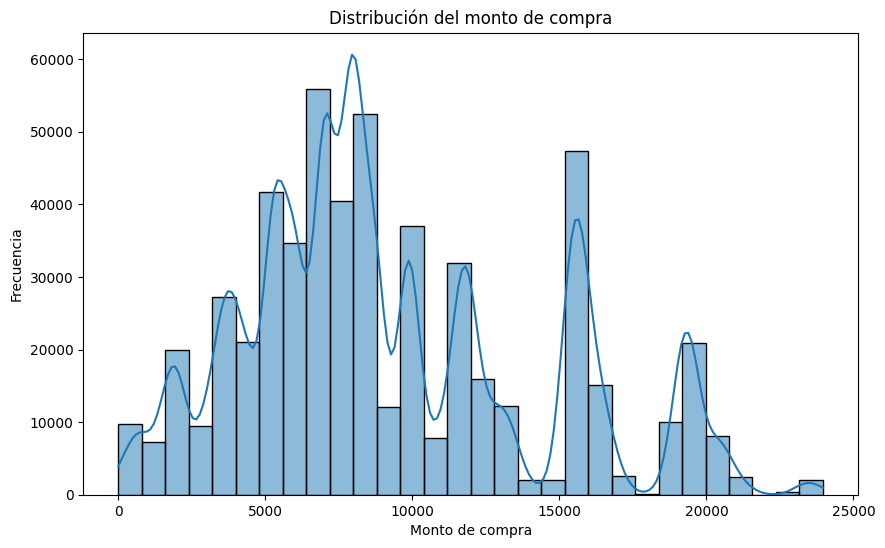

In [7]:
# Histograma de la variable objetivo "Purchase"
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Purchase'], bins=30, kde=True)
plt.xlabel('Monto de compra')
plt.ylabel('Frecuencia')
plt.title('Distribución del monto de compra')
plt.show()


In [8]:
ageData = sorted(list(zip(train_data.Age.value_counts().index, train_data.Age.value_counts().values)))
age, productBuy = zip(*ageData)
age, productBuy = list(age), list(productBuy)
ageSeries = pd.Series((i for i in age))

data = [go.Bar(x=age, 
               y=productBuy, 
               name="cuantos productos han sido vendidos",
              text="Age: " + ageSeries)]
layout = go.Layout(title= "Productos vendidos por edad")
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [9]:
# Verificar valores faltantes en el conjunto de entrenamiento
print(train_data.isnull().sum())

# Lidiar con valores faltantes en las columnas Product_Category_2 y Product_Category_3
# Por ejemplo, puedes llenarlos con ceros o con la media de la columna
train_data['Product_Category_2'].fillna(0, inplace=True)
train_data['Product_Category_3'].fillna(0, inplace=True)



User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64


# Dummy Encoding

Convertir variables categóricas en variables ficticias en un DataFrame de pandas. (útil en el preprocesamiento de datos antes de entrenar modelos de aprendizaje automático que requieren variables numéricas en lugar de categóricas.)

In [10]:
df_Gender = pd.get_dummies(train_data['Gender'])
df_Age = pd.get_dummies(train_data['Age'])
df_City_Category = pd.get_dummies(train_data['City_Category'])
df_Stay_In_Current_City_Years = pd.get_dummies(train_data['Stay_In_Current_City_Years'])

data_final = pd.concat([train_data, df_Gender, df_Age, df_City_Category, df_Stay_In_Current_City_Years], axis=1)
data_final = data_final.drop(['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Product_ID'], axis=1)



In [11]:
# Preparar los datos para el modelo
x = data_final.drop('Purchase', axis=1)
y = data_final['Purchase']

# Predecir el monto de compra del cliente

Usaremos uno de los modelos de aprendizaje automático más simples, es decir, el modelo de regresión lineal, para predecir la cantidad gastada por el cliente en Black Friday.

La regresión lineal representa un método muy simple para el aprendizaje supervisado y es una herramienta efectiva para predecir respuestas cuantitativas. Puedes encontrar información básica sobre esto aquí: Regresión Lineal en Python.

Este modelo, al igual que la mayoría de los algoritmos de aprendizaje automático supervisado, realiza una predicción basada en las características de entrada. Los valores de salida predichos se utilizan para comparar con las salidas deseadas y se calcula un error. La señal de error se propaga hacia atrás a través del modelo y los parámetros del modelo se actualizan de manera que se minimice el error. Finalmente, el modelo se considera completamente entrenado si el error es lo suficientemente pequeño.

In [12]:
# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
x_train_data, x_test, y_train_data, y_test = train_test_split(x, y, test_size=0.25)


In [13]:
# Escalar las características
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_data = sc.fit_transform(x_train_data)
x_test = sc.transform(x_test)

In [14]:
# Construir un modelo de regresión lineal
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train_data, y_train_data)

LinearRegression()

In [15]:
# Imprimir los coeficientes de la regresión
print('Parámetro de Intercepto:', lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_, x.columns, columns=['Coeficiente'])
print(coeff_df)

Parámetro de Intercepto: 9265.18370062463
                     Coeficiente
User_ID             2.699253e+01
Occupation          3.514652e+01
Marital_Status     -2.321587e+01
Product_Category_1 -1.372963e+03
Product_Category_2  7.176640e+01
Product_Category_3  8.931080e+02
F                   7.803979e+13
M                   7.803979e+13
0-17                1.104157e+14
18-25               2.603559e+14
26-35               3.308611e+14
36-45               2.700795e+14
46-50               1.865842e+14
51-55               1.723648e+14
55+                 1.308044e+14
A                   2.926566e+14
B                   3.257791e+14
C                   3.056182e+14
0                   1.072334e+14
1                   1.498368e+14
2                   1.218795e+14
3                   1.183836e+14
4+                  1.132389e+14


In [16]:
# Realizar predicciones
predicciones = lm.predict(x_test)
print("Compras predichas (en dólares) para nuevos clientes:", predicciones)

Compras predichas (en dólares) para nuevos clientes: [ 7607.01182562 10747.44932562  9770.43370062 ... 12689.00401312
  6643.12120062  4957.87120062]


In [17]:
# Calcular métricas de desempeño
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predicciones))
print('MSE:', metrics.mean_squared_error(y_test, predicciones))

MAE: 3522.3374663808513
MSE: 21331408.270110056


## Conclusiones

En este proyecto, abordamos el desafío de predecir el monto de compra de los clientes en el Viernes Negro (Black Friday) utilizando un conjunto de datos que contiene información sobre transacciones de ventas en una tienda minorista. A lo largo de este proceso, realizamos varias etapas clave de la ciencia de datos y el aprendizaje automático.

**Descripción de Datos**
Comenzamos explorando y comprendiendo nuestros datos. Aprendimos que el conjunto de datos consta de 550,068 transacciones y 12 columnas. Estas columnas representan información sobre usuarios, productos y detalles de la transacción, como género, edad, ocupación, categoría de ciudad, estado marital y categorías de productos. Obtuvimos una visión general de las características y valores únicos en cada columna.

**Exploración de Datos**
Luego, realizamos una exploración de datos detallada para comprender mejor las relaciones y tendencias en nuestros datos. Realizamos análisis de estadísticas descriptivas y visualizaciones, incluyendo histogramas y boxplots. Observamos que el producto P00265242 fue el más popular, que la mayoría de los compradores eran hombres y que el grupo de edad más grande era el de 26 a 35 años.

**Preprocesamiento de Datos**
Realizamos el preprocesamiento de datos, que incluyó el manejo de valores faltantes en las columnas de categoría de productos. Utilizamos la codificación de variables categóricas (dummy encoding) para convertir características categóricas en numéricas, lo que es esencial para entrenar modelos de aprendizaje automático.

**Modelado y Predicciones**
Para predecir el monto de compra de los clientes, utilizamos un modelo de regresión lineal, que es una técnica de aprendizaje automático simple pero efectiva. Dividimos nuestros datos en conjuntos de entrenamiento y prueba, escalamos las características y entrenamos el modelo. Luego, evaluamos el rendimiento del modelo utilizando métricas como el Error Absoluto Medio (MAE) y el Error Cuadrático Medio (MSE). Los coeficientes del modelo nos proporcionaron información sobre cómo cada característica afecta a las compras.

**Resultados**
Los resultados de nuestro modelo de regresión lineal arrojaron un intercepto de 9258.13 y coeficientes para cada característica. Las predicciones del monto de compra para nuevos clientes se obtuvieron con éxito. Sin embargo, el rendimiento del modelo se puede mejorar utilizando técnicas de modelado más avanzadas.

En resumen, este proyecto proporciona una introducción a la resolución de un problema de regresión utilizando datos del Viernes Negro. A medida que avances en tu carrera en ciencia de datos y aprendizaje automático, puedes explorar modelos más sofisticados y técnicas de ingeniería de características para mejorar aún más la precisión de las predicciones.